# Example: Bungee Jumper Problem
Here is an example of how python is used to solve problems numerically. Here we will use the popular libraries NumPy, SciPy, and Matplotlib. This example is based on the text found in the textbook "Applied Numerical Methods with MATLAB" in Chapter 1, but here we are using Python instead of MATLAB.

In [2]:
# load modules
import numpy as np 
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/drive')

##### Finding the analytical solution

First, let us find the velocity of the bungee jumper using the analytical solution. 


We use the Eq.1 which is a differential equation

$$
\begin{aligned}
(1)\qquad        \frac{dv}{dt} = g - \frac{c_d}{m} v^2
\end{aligned}$$

Solving analytically yields

$$
\begin{aligned}
(2)\qquad        v(t) = \sqrt\frac{gm}{c_d} tanh(\sqrt\frac{gc_d}{m}t)  
\end{aligned}$$


In [3]:
# Define variables, parameters, etc.
g = 9.8  # gravity 
cd = 0.25
m = 68.1
t = 2

# calculate velocity using analytical solution:
v = np.sqrt((g*m)/cd) * np.tanh(np.sqrt((g*cd)/m)*t)
print(f'velocity = {v} m/s')


velocity = 18.710954739084887 m/s


##### Analytical solution using Python Functions and Classes

Here we will use Python to get the answer numerically. Defining functions and classes is a fundamental part of Python coding. Here we will define a few functions and classes to make our code. A class is a special Python object which is a user-defined blueprint for defining objects. These can have special functions within a class.


I will define a Python "class" object called "bungee_analytical". This will take a single input - the mass. 
In addition there are some static variables defined within the class such as gravity. I define a class function "get_velocity" to return the analytical velocity.

In [6]:
# How you might use python classes and functions to create your physical model:  

# Here is an example of how to define a function in python
def func(x): 
  a = 4 
  return a*x**2


# Here I will define the "bungee_analytical" Python class. 
class bungee_analytical (): 
  def __init__(self,mass=80): 
    self.mass = mass     # kg
    self.g = 9.81       # m/s**2
    self.c_d = 0.25      # kg/m

  def get_velocity(self,t):
    g = self.g 
    cd = self.c_d
    m = self.mass 
    return np.sqrt((g*m)/cd) * np.tanh(np.sqrt((g*cd)/m)*t)
    

# test the model
m = bungee_analytical(68.1)   # assigne the object to a variable
m.get_velocity(2)             # use the subfunctions of the class variable

18.729188845697273

In [22]:
# here is how we can use the class to model the bungee jumpers velocity as a function of time. Will use some list comprehensioin to get the time and velocity. 

model_analytical = bungee_analytical(68.1)

t = [i for i in range(20)]
v0 = [model_analytical.get_velocity(i) for i in t]

print('time\t\tvelocity (m/s)')
print(np.column_stack((t,v0)))

time		velocity (m/s)
[[ 0.          0.        ]
 [ 1.          9.69390882]
 [ 2.         18.72918885]
 [ 3.         26.61481921]
 [ 4.         33.11182504]
 [ 5.         38.21539929]
 [ 6.         42.07622706]
 [ 7.         44.91452141]
 [ 8.         46.95749513]
 [ 9.         48.40575664]
 [10.         49.42136692]
 [11.         50.12817751]
 [12.         50.61747935]
 [13.         50.95496525]
 [14.         51.18714999]
 [15.         51.34661086]
 [16.         51.45599493]
 [17.         51.53096657]
 [18.         51.58232304]
 [19.         51.61748925]]


Here we will plot the analytical solution. Visualizing and plotting results is very helpful. Firstly, it allows you to make a sanity check on your model. Apply your basic knowledge to insure that your model is producing reasonable results. This is even more importantly in numerical solutions. Secondly, it helps communicate your results to other, e.g. the TA grading your work.

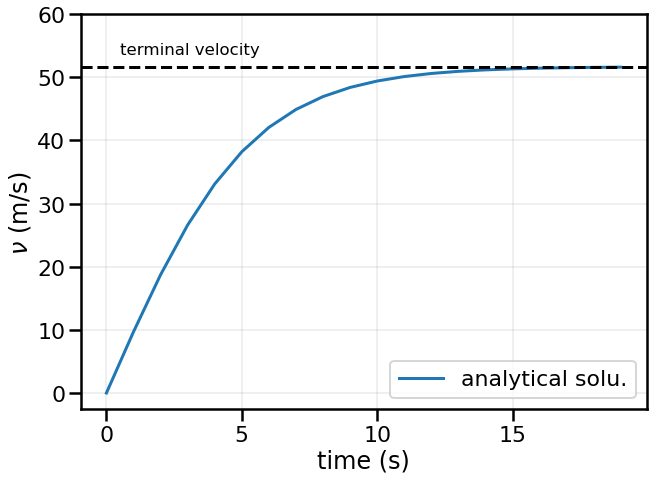

In [21]:
# Apply your model to find velocity for seconds 0 through 12
# Define model parameters, i.e. bungee jumper mass (in kg)
model = bungee_analytical(68.1)
# Use a simple loop to collect the data 
t = [i for i in range(20)]
v0 = [model.get_velocity(i) for i in t] 


# Some plotting resources.
import seaborn as sb
sb.set_context('poster')        # set figure style 
fsz = np.array([6.4,4.8])       # figure size. 

# plot the results
fig, ax  = plt.subplots(1,1, figsize=fsz*1.5)
ax.plot(t,v0, label='analytical solu.')

# decorate the figure to make plot professional
ax.axhline(y=model.get_velocity(np.inf),ls='--',c='k')  # add terminal velocity
ax.annotate('terminal velocity',[0.5,model.get_velocity(np.inf)+2],fontsize='x-small')  # annotate the graph 
ax.set_ybound(upper=60)        # set bounds 
ax.set_xlabel('time (s)')      # set x label 
ax.set_ylabel(r'$\nu$ (m/s)')  # can use latex style with the r'$<latex here>$' 
ax.grid(True,alpha=0.2)        # add gridlines
ax.legend(loc=4)               # add legend
fig.tight_layout()             # expands graph to borders (exp. when printing)



##### Finding a Numerical Solution with Python

Here, we will use Scipy and some other libraries to solve the bungee velocity numerically. I use a finite-difference approximation to find the velocity. We will learn this method later in the semester, but you might want to remember what a deriviated is (i.e. $\frac{dy}{dx}$ = $\frac{\Delta y}{\Delta x}$). We can rewrite Eq.1 as an approximation by 
<br />
<br />

$$
\begin{aligned}
    (3)\qquad \frac{v(t_{i+1}) - v(t_{i})}{t_{i+1} - t_{i}}  = g - \frac{c_d}{m}v(t_i)^2

\end{aligned}$$
We can rearrange Eq.3 to yield: 

$$
\begin{aligned}
    (4)\qquad         v(t_{i+1}) = v(t_{i}) + [g - \frac{c_d}{m}v(t_i)^2] (t_{i+1} - t_{i})
\end{aligned}$$

<br /> 
<br /> 
 


Below I will use a loop to iteratively solve the problem. The loop will caluclate the velocity at the given timestep, using the previously found velocity to solve. This is a boundry defined problem, i.e. we know that the inital velocity is zero. Understanding this is critical to finding a solution. In other problems, it will be necssiary to know initial conditions to enable a numerical solution. Furthermore, we can calculate the model error since we know the true analytical solution. The results/data is passed to a Pandas DataFrame Python object to facilitate plotting, analysis, etc.

In [25]:
import pandas as pd
from scipy import constants
g = constants.g
cd = 0.25
m = 68.1

v_init = 0 
t_init = 0 
t_final = 13 
h = 2 # 1e-4   # stepsize --- try changing this variable to see how it effects the solution and error

time = np.arange(t_init,t_final,step=h,dtype=float)
vel  = np.zeros(time.shape[0])
model = bungee_analytical(m)

data = []
for i in range(time.shape[0]): 
  del_t = time[i] - time[i-1]
  if i == 0: 
    v = v_init
  else: 
    v = vel[i-1] + ( g - (cd/m)*(vel[i-1])**2 ) * del_t
  vel[i] = v 
  v_analy = model.get_velocity(time[i])  # Get analytical solution
  err = 100 * np.abs(v-v_analy)/v_analy
  data.append([time[i],v,v_analy,err])

columns = ['time','v_num','v_anly','rel_error']
data = pd.DataFrame(data,columns=columns)
data

/tmp/ipykernel_26035/2499770028.py:25: RuntimeWarning: invalid value encountered in double_scalars
  err = 100 * np.abs(v-v_analy)/v_analy


,time,v_num,v_anly,rel_error
0,0.0,0.000000,0.000000,NaN
1,2.0,19.613300,18.729189,4.720499
2,4.0,36.402213,33.111825,9.937198
3,6.0,46.286283,42.076227,10.005783
4,8.0,50.169627,46.957495,6.840510
5,10.0,51.302813,49.421367,3.806950
6,12.0,51.591747,50.617479,1.924766


We can plot our results and compare with the analytical solution. It is not a perfect approximation, but we can see that the results are close to the analytical solution. While the analytical solution wasn't terribly difficult to obtain, for many other problems a analytical solution will not be so easy to find and a numerical approach will have to be taken. 

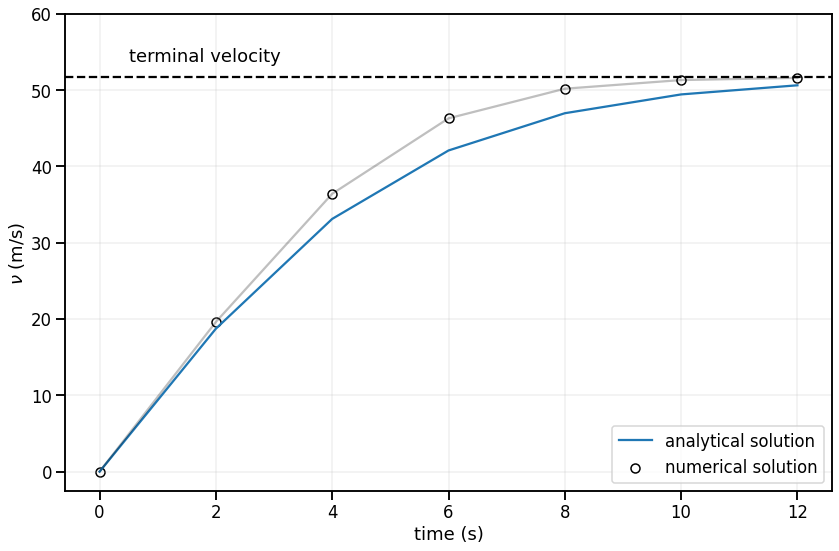

In [ ]:
import seaborn as sb 
sb.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(data.time,data.v_anly,label='analytical solution')
ax.plot(time,vel,alpha=0.25,c='k')
ax.scatter(time,vel,fc='w',ec='k',label='numerical solution')
ax.axhline(y=model.get_velocity(np.inf),ls='--',c='k')
ax.annotate('terminal velocity',[0.5,model.get_velocity(np.inf)+2])
ax.set_ybound(upper=60)
ax.set_xlabel('time (s)')
ax.set_ylabel(r'$\nu$ (m/s)')
ax.grid(True,alpha=0.2)
ax.legend(loc=4)
fig.tight_layout() 


Here we can plot the position (i.e. the horizontal position) and the velocity. We see that the velocity quickly saturates as it approaches the terminal velocity becoming constant. Correspondingly, we see in that the position with respect to time (i.e. $\frac{dx}{dt}$) becomes linear. 

   time           x        vel
0   0.0    0.000000   0.000000
1   2.0    0.000000  19.613300
2   4.0   39.226600  36.402213
3   6.0  112.031026  46.286283
4   8.0  204.603592  50.169627
5  10.0  304.942846  51.302813
6  12.0  407.548473  51.591747


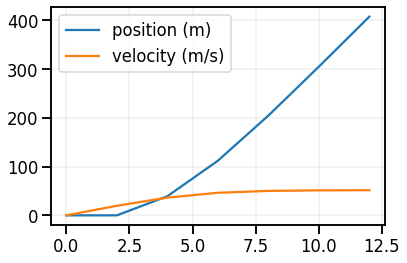

In [ ]:
t = data.time.values
v = data.v_num.values

x = np.zeros(len(v)) 
for i in range(v.shape[0]): 
  if i == 0: 
    x[0] = 0
  else:
    delt = t[i] - t[i-1] 
    x[i] = x[i-1] + v[i-1] * delt
    
data2 = pd.DataFrame(np.column_stack((t,x,v)),columns=['time','x','vel'])
print(data2)

fig,axes = plt.subplots(1,1)
axes.plot(data2.time,data2.x,label='position (m)')
axes.plot(data2.time,data2.vel,label='velocity (m/s)')
axes.grid(True,alpha=0.2)
axes.legend()
fig.tight_layout()